In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error  as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [3]:
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV

In [4]:
df = pd.read_csv("C:\\Users\\data2\\OneDrive\\Masaüstü\\codeware\\TASKS\\5task\\dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11856 entries, 0 to 11855
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sID       11856 non-null  int64 
 1   Datetime  11856 non-null  object
 2   Count     11856 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 278.0+ KB


In [6]:
df["Datetime"]= pd.to_datetime(df["Datetime"])

C:\Users\data2\AppData\Local\Temp\ipykernel_19844\3242123255.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Datetime"]= pd.to_datetime(df["Datetime"])


In [7]:
df["year"] = df["Datetime"].dt.year
df["month"] = df["Datetime"].dt.month
df["day"] = df["Datetime"].dt.day
df["hour"] = df["Datetime"].dt.hour

In [8]:
df=df.set_index("Datetime")

In [9]:
p90= len(df) *(0.9)

In [10]:
p90 = np.round(p90)

In [11]:
p90=p90.astype(int)

In [12]:
train_size=df.iloc[0:p90]

In [13]:
test_size=df.iloc[p90:]

In [14]:
df.tail(5)  , test_size.tail()

(                       sID  Count  year  month  day  hour
 Datetime                                                 
 2013-12-31 19:00:00  11851    286  2013     12   31    19
 2013-12-31 20:00:00  11852    256  2013     12   31    20
 2013-12-31 21:00:00  11853    228  2013     12   31    21
 2013-12-31 22:00:00  11854    216  2013     12   31    22
 2013-12-31 23:00:00  11855    246  2013     12   31    23,
                        sID  Count  year  month  day  hour
 Datetime                                                 
 2013-12-31 19:00:00  11851    286  2013     12   31    19
 2013-12-31 20:00:00  11852    256  2013     12   31    20
 2013-12-31 21:00:00  11853    228  2013     12   31    21
 2013-12-31 22:00:00  11854    216  2013     12   31    22
 2013-12-31 23:00:00  11855    246  2013     12   31    23)

# Default Degerler (hyperparameter girilmedi )

In [15]:
X_train =train_size.drop("Count",axis=1)
y_train = train_size["Count"]

In [16]:

X_test =test_size.drop("Count", axis=1)
y_test = test_size["Count"]

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
lreg =LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred11 =lreg.predict(X_test)

In [21]:
mse_lreg = mse(y_test, y_pred11)
mae_lreg= mae(y_test, y_pred11)
mape_lreg=mape(y_test, y_pred11)
rmse_lreg =np.sqrt(mse(y_test,y_pred11))
print(mse_lreg)
print(mae_lreg)
print(mape_lreg)
print(rmse_lreg)

5426.593534844751
60.43858614357732
0.9194984730923907
73.66541613840752


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
forest_regg=RandomForestRegressor()

In [24]:
forest_regg.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
y_pred12 = forest_regg.predict(X_test)

In [26]:
mse_forestregg = mse(y_test, y_pred12)
mae_forestregg= mae(y_test, y_pred12)
mape_forestregg=mape(y_test, y_pred12)
rmse_forestregg =np.sqrt(mse(y_test,y_pred12))
print(mse_forestregg)
print(mae_forestregg)
print(mape_forestregg)
print(rmse_forestregg)

3969.7598927487347
46.69713322091063
0.7413448968930917
63.006030606194635


## SVM

In [27]:
from sklearn.svm import SVR

In [28]:
sv_reg=SVR()

In [29]:
sv_reg.fit(X_train,y_train)

SVR()

In [30]:
y_pred13 =sv_reg.predict(X_test)

In [31]:
mse_sv_reg = mse(y_test, y_pred13)
mae_sv_reg= mae(y_test, y_pred13)
mape_sv_reg=mape(y_test, y_pred13)
rmse_sv_reg =np.sqrt(mse(y_test,y_pred13))
print(mse_sv_reg)
print(mae_sv_reg)
print(mape_sv_reg)
print(rmse_sv_reg)

7023.928688487347
65.275071639749
0.7972478404215554
83.80888191884765


## xGboost Regressor

#### Okul zamaninda da xgboost kutuphanesini yuklemeye calismis , yuklemis ona ragmen boyle bir problem ile karsilasmistim

In [32]:
# Bunu cmd ve bash ile yuklemeye calistim en cok zamanim burada gitti :\\ :)
#%pip install xgboost

In [33]:
from xgboost import XGBRegressor as xgbR

In [34]:
xg_regg =xgbR()

In [35]:
xg_regg.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred14 =xg_regg.predict(X_test)

In [37]:
mse_xg_regg = mse(y_test, y_pred14)
mae_xg_regg= mae(y_test, y_pred14)
mape_xg_regg=mape(y_test, y_pred14)
rmse_xg_regg =np.sqrt(mse(y_test,y_pred14))
print(mse_xg_regg)
print(mae_xg_regg)
print(mape_xg_regg)
print(rmse_xg_regg)

6945.676921673017
60.74615244680472
0.8548266598170733
83.34072786862986


## Light GBM

In [38]:
#!pip install numpy scipy scikit-learn -q

In [39]:
#!pip install lightgbm -q

In [40]:
import lightgbm as lgb

In [41]:
lgbm_regg=lgb.LGBMRegressor()

In [42]:
lgbm_regg.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 10670, number of used features: 5
[LightGBM] [Info] Start training from score 50.675164


LGBMRegressor()

In [43]:
y_pred15 = lgbm_regg.predict(X_test)

In [44]:
mse_lgbm_regg = mse(y_test, y_pred15)
mae_lgbm_regg= mae(y_test, y_pred15)
mape_lgbm_regg=mape(y_test, y_pred15)
rmse_lgbm_regg =np.sqrt(mse(y_test,y_pred15))
print(mse_lgbm_regg)
print(mae_lgbm_regg)
print(mape_lgbm_regg)
print(rmse_lgbm_regg)

4936.673079424038
50.77017881672122
0.773287891528787
70.26146226363382


# BEST hyperparameter :
### GridSearchCV ve RandomizedSearchCV 

# GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV as gs, RandomizedSearchCV as rs

# 1-Linear Regression

#1- oncelikle kullandigin modelin hyperparametre alacagi deger araliklarini ogren (scikit-learn veya () icine shift+tab bas )

#2- best paramdan once bir fit etmek gerekir ki best parametreleri bulsun

In [46]:
lreg_params= {
    "fit_intercept" : [True,False],
    "copy_X": [True,False],
    "n_jobs" : [None,1,-1]
}
type(lreg_params)

dict

In [47]:
gridsearch_model = gs(estimator=lreg, param_grid=lreg_params, cv=10, scoring="neg_mean_squared_error")
gridsearch_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, -1]},
             scoring='neg_mean_squared_error')

In [48]:
best_lr= gridsearch_model.best_params_

In [49]:
# ** yapisi sozluk icindeki key value degerlerini sirasi ile disari doker
lreg_gridmodel = LinearRegression(**best_lr)

In [50]:
lreg_gridmodel.fit(X_train,y_train)
y_pred21=lreg_gridmodel.predict(X_test)

In [51]:
mse_lreg21_gridmodel = mse(y_test, y_pred21)
mae_lreg21_gridmodel= mae(y_test, y_pred21)
mape_lreg21_gridmodel=mape(y_test, y_pred21)
rmse_lreg21_gridmodel =np.sqrt(mse(y_test,y_pred21))
print(mse_lreg21_gridmodel)
print(mae_lreg21_gridmodel)
print(mape_lreg21_gridmodel)
print(rmse_lreg21_gridmodel)

5426.593534844751
60.43858614357732
0.9194984730923907
73.66541613840752


## 2-Random Forest Regressor

In [52]:
""""
forest_params={
    "n_estimators":range(10,150,10),
    "criterion" : ["squared_error","absolute_error","friedman_mse","poisson"],
    "max_depth" : range(0,3),
    #depth none vermis ne kadar olmali hakkinda tecrubem yok
}
"'"

SyntaxError: incomplete input (2294556799.py, line 1)

#### aslinda rangei cok daha ayrintili yapacaktik fakat internet hizimdan dolayi demo olarak yaptim. diger orneklerde bu kadar fazla parametre koymayacagim 4x5x4x3 kez calismasi bile cok uzun zaman aldi.optimal degerler yaklasik olarak internette bulunmakta


In [53]:
forest_params={
    "n_estimators":range(100,150,25),
    "criterion" : ["squared_error","absolute_error"],
    "max_depth" : range(1,2)
    
}

In [54]:
gridsearch_forest =gs(estimator=forest_regg,param_grid=forest_params,cv=5,scoring="neg_mean_squared_error",verbose=3)

In [55]:
gridsearch_forest.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=-717.495 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=-316.413 total time=   0.3s
[CV 3/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=-462.328 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=-3403.099 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=-8528.446 total time=   0.4s
[CV 1/5] END criterion=squared_error, max_depth=1, n_estimators=125;, score=-719.488 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_depth=1, n_estimators=125;, score=-309.683 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_depth=1, n_estimators=125;, score=-458.939 total time=   0.5s
[CV 4/5] END criterion=squared_error, max_depth=1, n_estimators=125;, score=-3401.539 total time=   0.5s
[

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(1, 2),
                         'n_estimators': range(100, 150, 25)},
             scoring='neg_mean_squared_error', verbose=3)

In [64]:
best_forest=gridsearch_forest.best_params_
print(best_forest)

{'criterion': 'squared_error', 'max_depth': 1, 'n_estimators': 125}


In [65]:
forest_gridmodel=RandomForestRegressor(**best_forest)

In [66]:
forest_gridmodel.fit(X_train,y_train)
y_pred22=forest_gridmodel.predict(X_test)

In [67]:
mse_forest_gridmodel = mse(y_test, y_pred22)
mae_forest_gridmodel= mae(y_test, y_pred22)
mape_forest_gridmodel=mape(y_test, y_pred22)
rmse_forest_gridmodel =np.sqrt(mse(y_test,y_pred22))
print(mse_forest_gridmodel)
print(mae_forest_gridmodel)
print(mape_forest_gridmodel)
print(rmse_forest_gridmodel)

7739.636191104318
67.17247658115976
0.7544439559676306
87.9752021373314


## 3-SVM

In [68]:
''''
svm_params={
    "kernel" : ["linear","poly","sigmoid","rbf",],
    "gamma" : ["auto","scale"],
    "shrinking" : [True,False],
}
''''

SyntaxError: unterminated string literal (detected at line 7) (3832109157.py, line 7)

In [69]:

svm_params={
    "kernel" : ["poly","sigmoid"],
    "shrinking" : [True,False],
}


In [70]:
svm_gridmodel =gs(estimator=sv_reg,param_grid=svm_params,cv=5,scoring="neg_mean_squared_error",verbose=3)

In [71]:
svm_gridmodel.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....kernel=poly, shrinking=True;, score=-139.793 total time=   5.5s
[CV 2/5] END ....kernel=poly, shrinking=True;, score=-137.866 total time=   5.6s
[CV 3/5] END ....kernel=poly, shrinking=True;, score=-326.403 total time=   5.6s
[CV 4/5] END ...kernel=poly, shrinking=True;, score=-1494.478 total time=   5.7s
[CV 5/5] END ...kernel=poly, shrinking=True;, score=-5330.451 total time=   5.6s
[CV 1/5] END ...kernel=poly, shrinking=False;, score=-139.791 total time=   5.9s
[CV 2/5] END ...kernel=poly, shrinking=False;, score=-137.866 total time=   6.4s
[CV 3/5] END ...kernel=poly, shrinking=False;, score=-326.403 total time=   5.8s
[CV 4/5] END ..kernel=poly, shrinking=False;, score=-1494.478 total time=   6.1s
[CV 5/5] END ..kernel=poly, shrinking=False;, score=-5330.451 total time=   6.5s
[CV 1/5] END kernel=sigmoid, shrinking=True;, score=-188041.282 total time=   6.4s
[CV 2/5] END kernel=sigmoid, shrinking=True;, s

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'kernel': ['poly', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='neg_mean_squared_error', verbose=3)

In [72]:
best = svm_gridmodel.best_params_

In [73]:
svm_gridmodel=SVR(**best)

### Best bulduktan sonra tekrar fit etmek gerekir

In [74]:
svm_gridmodel.fit(X_train,y_train)

SVR(kernel='poly', shrinking=False)

In [75]:
y_pred23 = svm_gridmodel.predict(X_test)

In [76]:
mse_svm_gridmodel = mse(y_test, y_pred23)
mae_svm_gridmodel= mae(y_test, y_pred23)
mape_svm_gridmodel=mape(y_test, y_pred23)
rmse_svm_gridmodel =np.sqrt(mse(y_test,y_pred23))
print(mse_svm_gridmodel)
print(mae_svm_gridmodel)
print(mape_svm_gridmodel)
print(rmse_svm_gridmodel)

6411.864826690116
67.1095530827248
1.0382235983152346
80.07412082995427


## 4-xGBoost

In [77]:
xgb_params={
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
    
}

In [78]:
xgb_gridmodel=gs(estimator=xg_regg,param_grid=xgb_params,cv=5,scoring="neg_mean_squared_error",verbose=3)

In [79]:
xgb_gridmodel.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=-1263.769 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=-960.898 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=-438.906 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=-1245.332 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=-10376.353 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=-1267.038 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=-963.993 total 

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8;, score=-1138.256 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8;, score=-994.598 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8;, score=-460.170 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8;, score=-1653.327 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=0.8;, score=-9045.130 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0;, score=-1140.700 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=50, subsample=1.0;, score=-1001.664 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8;, score=-234.287 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8;, score=-369.118 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8;, score=-4424.855 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8;, score=-4269.158 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0;, score=-152.091 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0;, score=-234.996 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0;, score=-388.517 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_de

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8;, score=-366.686 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8;, score=-3712.826 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8;, score=-3634.820 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0;, score=-146.962 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0;, score=-163.938 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0;, score=-342.584 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0;, score=-2395.215 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_d

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.8;, score=-13229.983 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=0.8;, score=-5283.975 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=1.0;, score=-226.847 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=1.0;, score=-413.904 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=1.0;, score=-423.266 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=1.0;, score=-11412.252 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=50, subsample=1.0;, score=-5042.369 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, ma

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0;, score=-1131.004 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0;, score=-933.515 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0;, score=-440.264 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0;, score=-1464.746 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0;, score=-9135.126 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8;, score=-533.312 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8;, score=-515.638 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0

[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0;, score=-4508.823 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0;, score=-3944.944 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=-145.814 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=-215.303 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=-386.983 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=-4850.919 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=-4325.646 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1,

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=1.0;, score=-5493.138 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8;, score=-197.439 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8;, score=-412.791 total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8;, score=-453.254 total time=   0.3s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8;, score=-15898.637 total time=   0.4s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8;, score=-5648.172 total time=   0.3s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0;, score=-173.437 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-155.843 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-504.391 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-463.981 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-10763.265 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-4586.561 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0;, score=-176.200 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0;, score=-614.119 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [80]:
best=xgb_gridmodel.best_params_

In [81]:
best_xgb_gridmodel=xgbR(**best)

In [82]:
y_pred24=xgb_gridmodel.predict(X_test)

In [83]:
mse_xgb_gridmodel = mse(y_test, y_pred24)
mae_xgb_gridmodel= mae(y_test, y_pred24)
mape_xgb_gridmodel=mape(y_test, y_pred24)
rmse_xgb_gridmodel =np.sqrt(mse(y_test,y_pred24))
print(mse_xgb_gridmodel)
print(mae_xgb_gridmodel)
print(mape_xgb_gridmodel)
print(rmse_xgb_gridmodel)

4052.8179731173896
47.22099174255062
0.7216068864841765
63.661746544666755


## 5-Light GBM

In [84]:
''''
lgbm_params={
    "num_leaves":range(30,50,10),
    "learning_rate": [0.05, 0.1, 0.15],
    "n_estimators" : range(100,50,300),
    "max_depth" : range(0,20,5),
}

''''

SyntaxError: unterminated string literal (detected at line 9) (3831975402.py, line 9)

In [85]:
lgbm_params = {
    "num_leaves": [40, 50],
    "learning_rate": [0.05],
    "n_estimators": [200],
    "max_depth": [15],
}

In [86]:
lgbm_gridmodel = gs(estimator=lgbm_regg,param_grid=lgbm_params,cv=5,scoring="neg_mean_absolute_error",verbose=3)

In [87]:
lgbm_gridmodel.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 8536, number of used features: 5
[LightGBM] [Info] Start training from score 60.852390
[CV 1/5] END learning_rate=0.05, max_depth=15, n_estimators=200, num_leaves=40;, score=-7.550 total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 8536, number of used features: 5
[LightGBM] [Info] Start training from score 59.240394
[CV 2/5] END learni

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.05], 'max_depth': [15],
                         'n_estimators': [200], 'num_leaves': [40, 50]},
             scoring='neg_mean_absolute_error', verbose=3)

In [88]:
y_pred25=lgbm_gridmodel.predict(X_test)

In [89]:
mse_lgbm_gridmodel = mse(y_test, y_pred25)
mae_lgbm_gridmodel= mae(y_test, y_pred25)
mape_lgbm_gridmodel=mape(y_test, y_pred25)
rmse_lgbm_gridmodel =np.sqrt(mse(y_test,y_pred25))
print(mse_lgbm_gridmodel)
print(mae_lgbm_gridmodel)
print(mape_lgbm_gridmodel)
print(rmse_lgbm_gridmodel)

5149.45261702529
52.00104919739743
0.8070639074163172
71.75968657279162


# Metrik olcum ve gridsearchCV arasindaki farklar ve grafik

### gridsearch icerisinde scoring olarak mse kullandigimdan farki mse ile  gosterecegim

1-LINEAR REGRESSION

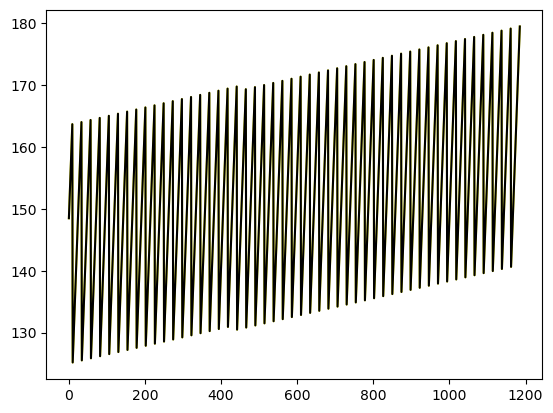

In [90]:
# Linear regression default parameter
plt.plot(y_pred11,color="yellow")
# Linear regression gridsearchCV
plt.plot(y_pred21,color="black")

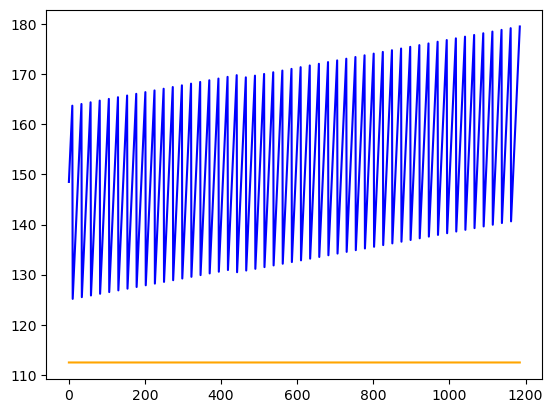

In [91]:
# Random Forest Regressor default parameter
plt.plot(y_pred21,color="blue")
# Random Forest Regressor gridsearchCV
plt.plot(y_pred22,color="orange")

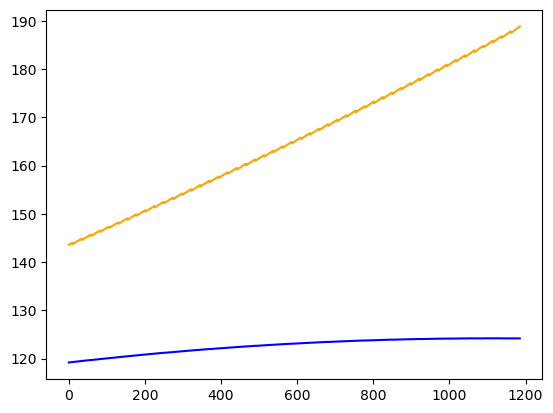

In [93]:
# SVMR Regressor default parameter
plt.plot(y_pred13,color="blue")
# SVMR Regressor gridsearchCV
plt.plot(y_pred23,color="orange")

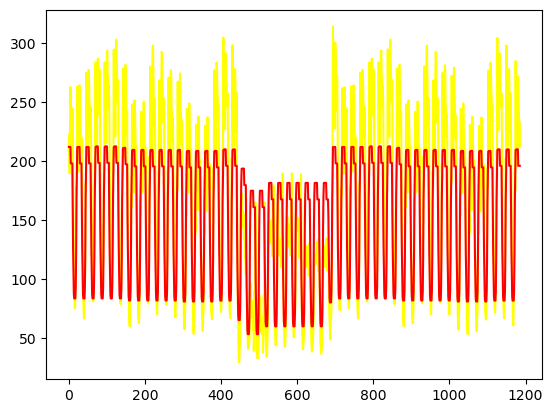

In [94]:
# xGboost Regressor default parameter
plt.plot(y_pred14,color="yellow")
# xGboost Regressor gridsearchCV
plt.plot(y_pred24,color="red")

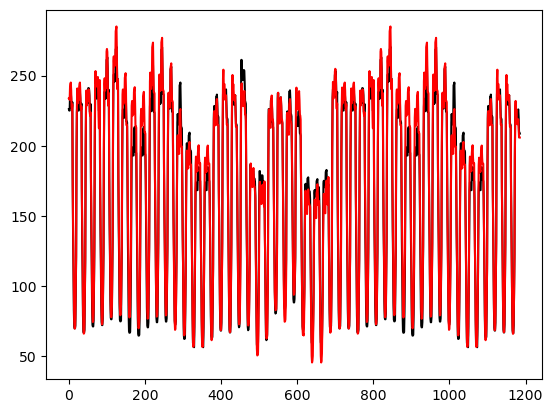

In [106]:
# LightGradientBoost Regressor default parameter
plt.plot(y_pred15,color="black")
# lightGradientBoost Regressor gridsorangeearchCV
plt.plot(y_pred25,color="red",linestyle= "-")